In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(style="darkgrid")
sns.set_context('talk')

## Load simulation results of Case3

In [3]:
file = r'E:\projects\MLChemicalR\upload\case3\Comparison_predict_5KDataset.csv'
dataCase3 =pd.read_csv(file)
dataCase3.head()

,testDataY,predDataY,modelType,var,group,modelSimulation
0,0.095850,0.094232,rfModel,Vol(aq),group1,rfModel_simulation
1,0.096509,0.095509,rfModel,Vol(aq),group1,rfModel_simulation
2,0.103204,0.100302,rfModel,Vol(aq),group1,rfModel_simulation
3,0.035791,0.035790,rfModel,Vol(aq),group1,rfModel_simulation
4,0.077373,0.077295,rfModel,Vol(aq),group1,rfModel_simulation


## Load simulation results of Case3_2 which the predicted pH  as input for simulating Si(aq)

In [4]:
file = r'E:\projects\MLChemicalR\upload\case3_2\Comparison_predict_5KDataset.csv'
dataCase31 =pd.read_csv(file)
dataCase31.head()

,testDataY,predDataY,modelType,var,group,modelSimulation
0,12.47261,12.47261,CONST,pH,group1,GPyModel_simulation
1,12.47261,12.47261,CONST,pH,group1,GPyModel_simulation
2,12.47261,12.47261,CONST,pH,group1,GPyModel_simulation
3,12.47261,12.47261,CONST,pH,group1,GPyModel_simulation
4,12.47261,12.47261,CONST,pH,group1,GPyModel_simulation


In [19]:
def drawPlotsV2(trgVar,dfpH1,dfpH2,simulation,scale):
    
    fig, ax =plt.subplots(figsize=(8,8))
    df = dfpH1.sort_values(by=['testDataY'])
    axMax = max(dfpH1['testDataY'].max(),dfpH2['predDataY'].max())
    axMin = min(dfpH1['testDataY'].min(),dfpH2['predDataY'].min())
    x2= np.linspace(axMin,axMax,30);
    y2 = x2
    df11 = dfpH1[dfpH1['group']=='group1']
    df11 =df11.reset_index(drop=True)
    ax.plot(df11['testDataY'],df11['predDataY'],'co',markersize =12,label ='Case3: Group 1')
    df12 = dfpH1[dfpH1['group']=='group2']
    df12 =df12.reset_index(drop=True)
    ax.plot(df12['testDataY'],df12['predDataY'],'bo',markersize =6,label ='Case3: Group 2')
    df13 = dfpH1[dfpH1['group']=='group3']
    df13 =df13.reset_index(drop=True)
    ax.plot(df13['testDataY'],df13['predDataY'],'yo',markersize =12,label ='Case3: Group 3')

    #df11 = dfpH2[dfpH2['group']=='group1']
    #df11 =df11.reset_index(drop=True)
    #ax.plot(df11['testDataY'],df11['predDataY'],'b^',markersize =12,label ='Case3_1: Group 1')
    df12 = dfpH2[dfpH2['group']=='group2']
    df12 =df12.reset_index(drop=True)
    ax.plot(df12['testDataY'],df12['predDataY'],'g^',markersize =12,label ='Case3_2: Group 2')
    #df13 = dfpH2[dfpH2['group']=='group3']
    #df13 =df13.reset_index(drop=True)
    #ax.plot(df13['testDataY'],df13['predDataY'],'y^',markersize =12,label ='Case3_1: Group 3')
    
    
    
    ax.plot(x2,y2,'r-',lw=3,label ='1:1 ratio')
    ax.set_xlim(axMin,axMax)
    ax.set_ylim(axMin,axMax)
    ax.legend (loc='best',ncol=1)
    if scale=='log':
        ax.set_xscale('log')
        ax.set_yscale('log')
    ax.set_title(simulation+ ' ====> '+trgVar)
    ax.set_xlabel('testDataY')
    ax.set_ylabel('PredDataY')    
        

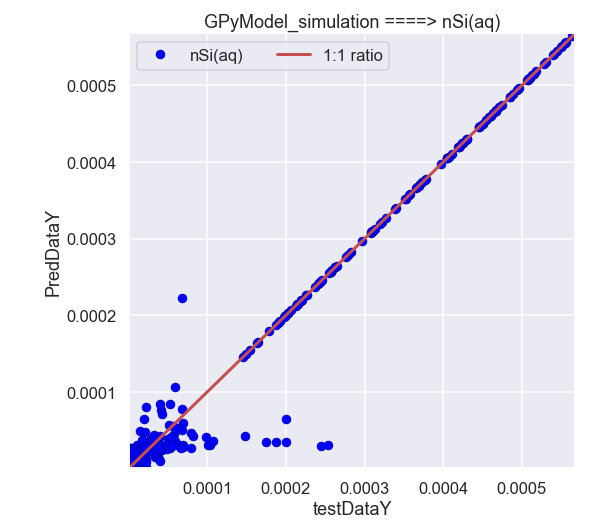

In [20]:
pHCase31.head()

,testDataY,predDataY,modelType,var,group,modelSimulation
1002,0.000003,0.000003,GPyModel,nSi(aq),group1,GPyModel_simulation
1003,0.000003,0.000003,GPyModel,nSi(aq),group1,GPyModel_simulation
1004,0.000003,0.000003,GPyModel,nSi(aq),group1,GPyModel_simulation
1005,0.000001,0.000001,GPyModel,nSi(aq),group1,GPyModel_simulation
1006,0.000002,0.000002,GPyModel,nSi(aq),group1,GPyModel_simulation


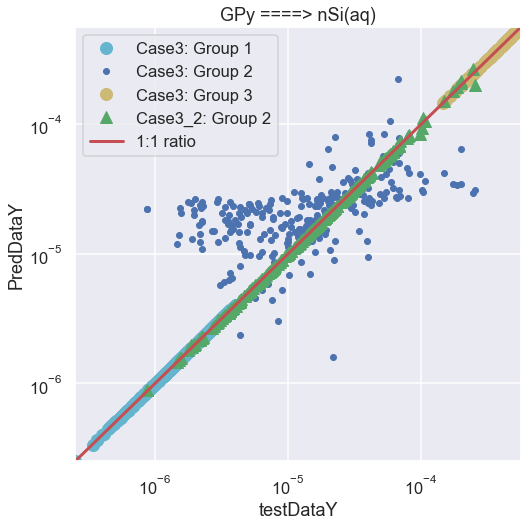

In [21]:
pHCase3 = dataCase3[(dataCase3['var']=='nSi(aq)') & (dataCase3['modelSimulation']=='GPyModel_simulation')]

pHCase31 = dataCase31[dataCase31['var']=='nSi(aq)']
drawPlotsV2('nSi(aq)',pHCase3,pHCase31,'GPy',scale='log')